In [107]:
import pandas as pd
import numpy as np
from pandas import read_csv
import statsmodels.api as sm
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.api import qqplot

#import statsmodels
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


%matplotlib inline

# Visualizing our data for best understanding

In [14]:
#'[1h]BTCUSDT.csv'
data1 = pd.read_csv('./data/[1h]BTCUSDT.csv')
data1.head()

,Start,Stop,Open,Close,Low,High,Volume
0,1502942400000,1502945999999,4261.48,4308.83,4261.32,4313.62,47.181009
1,1502946000000,1502949599999,4308.83,4315.32,4291.37,4328.69,23.234916
2,1502949600000,1502953199999,4330.29,4324.35,4309.37,4345.45,7.229691
3,1502953200000,1502956799999,4316.62,4349.99,4287.41,4349.99,4.443249
4,1502956800000,1502960399999,4333.32,4360.69,4333.32,4377.85,0.972807


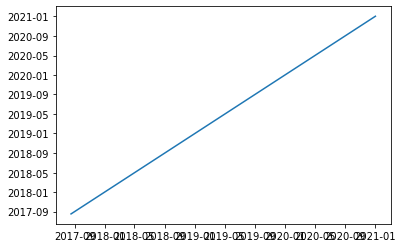

In [16]:
ax1 = pd.to_datetime(data1['Start'].values, unit='ms').values
bx1 = pd.to_datetime(data1['Stop'].values, unit='ms').values
plt.plot(bx1,ax1)

In [20]:
print('ax1:', ax1)
print('bx1:', bx1)

ax1: ['2017-08-17T04:00:00.000000000' '2017-08-17T05:00:00.000000000'
 '2017-08-17T06:00:00.000000000' ... '2020-12-31T22:00:00.000000000'
 '2020-12-31T23:00:00.000000000' '2021-01-01T00:00:00.000000000']
bx1: ['2017-08-17T04:59:59.999000000' '2017-08-17T05:59:59.999000000'
 '2017-08-17T06:59:59.999000000' ... '2020-12-31T22:59:59.999000000'
 '2020-12-31T23:59:59.999000000' '2021-01-01T00:59:59.999000000']


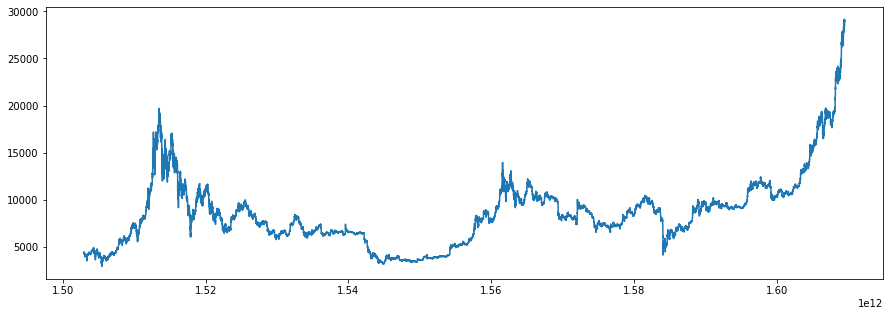

In [46]:
ax=data1['Stop']
ay=data1['Close']
plt.figure(figsize=(15,5))
plt.plot(ax,ay)
plt.show()

In [50]:
plt.figure(figsize=(8,4))
X = ay[1000:2000].values

<Figure size 576x288 with 0 Axes>

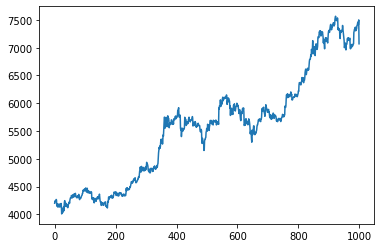

In [51]:
plt.plot(X);

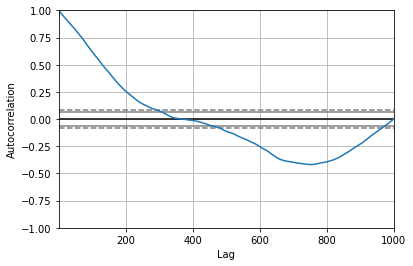

In [53]:
autocorrelation_plot(X)
plt.show()

# Autoregressive Moving Average

In [101]:
arma_mod1=ARIMA(data1['Close'], order=(1, 0, 1)).fit()
print(arma_mod1.params)
print(arma_mod1.aic, arma_mod1.bic, arma_mod1.hqic)
sm.stats.durbin_watson(arma_mod1.resid.values)

const     8539.083522
ar.L1        0.999963
ma.L1       -0.072883
sigma2    8949.682347
dtype: float64
351879.9193936492 351913.08472025674 351890.5698092789


1.9304899197639633

## Analyzing our data

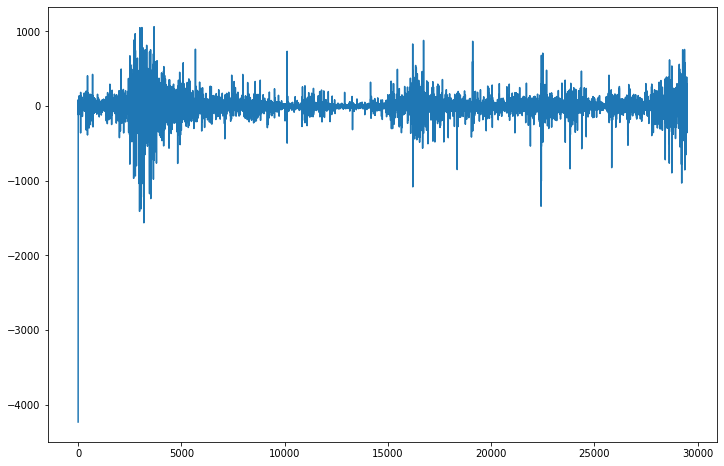

In [66]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod1.resid.plot(ax=ax);

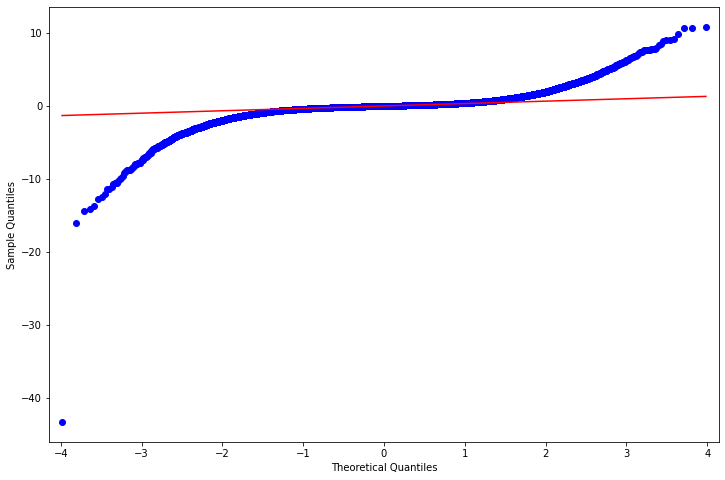

In [71]:
resid = arma_mod1.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

## Building autocorrelation

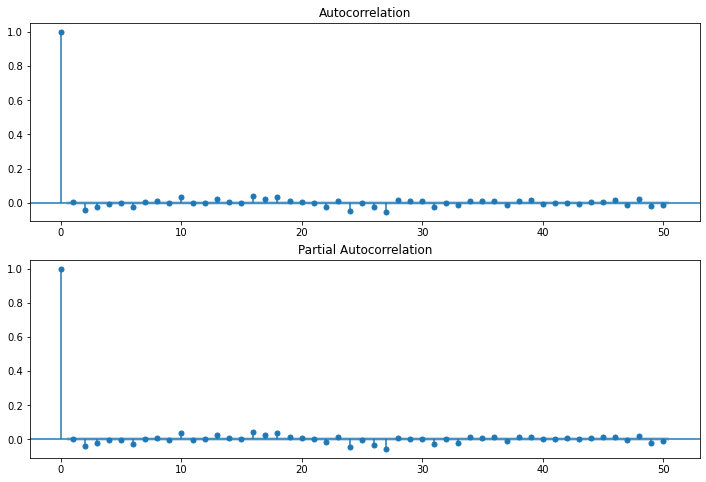

In [75]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=50, ax=ax2)

## Making and building prediction

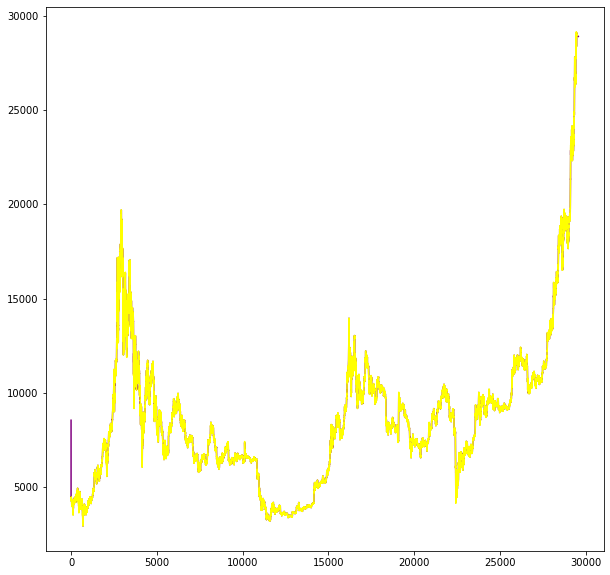

In [96]:
pred1 = arma_mod1.predict(0, len(ay)+100)
plt.figure(figsize=(10,10))
plt.plot(range(len(pred1)), pred1, c='purple')
plt.plot(range(len(ay)), ay, c='yellow')

## Making and building predictions with test/train

In [118]:
test = X[len(X)-21:len(X)] #size 27
train = X[0:len(X)-21] #size 979
predictions = []

In [119]:
arma_mod1_train = ARIMA(train, order=(1, 0, 1)).fit()

In [124]:
predictions = arma_mod1_train.predict(start=979,end=1006)

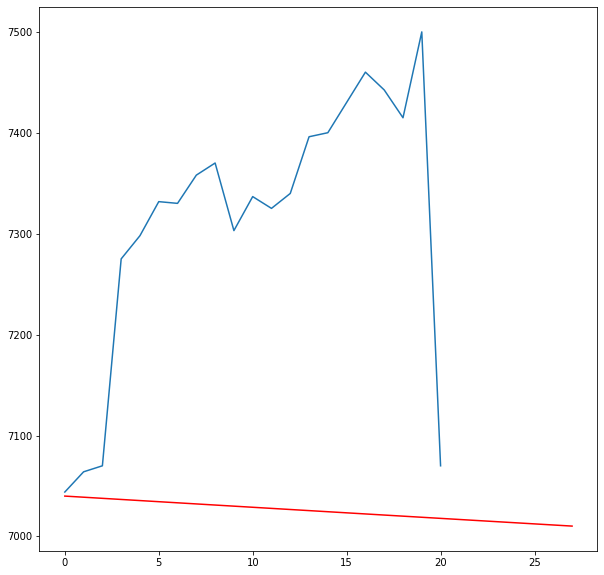

In [126]:
plt.figure(figsize=(10,10))
plt.plot(test)
plt.plot(predictions,c='red')

# Autoregressive Integrated Moving Average

In [102]:
arima_mod1=ARIMA(data1['Close'], order=(1, 1, 1)).fit()
print(arima_mod1.params)
print(arima_mod1.aic, arima_mod1.bic, arima_mod1.hqic)
sm.stats.durbin_watson(arima_mod1.resid.values)

ar.L1        0.526222
ma.L1       -0.599589
sigma2    8929.033684
dtype: float64
351780.30441078276 351805.17830395896 351788.2922027253


1.929263877276925

## Analyzing our data

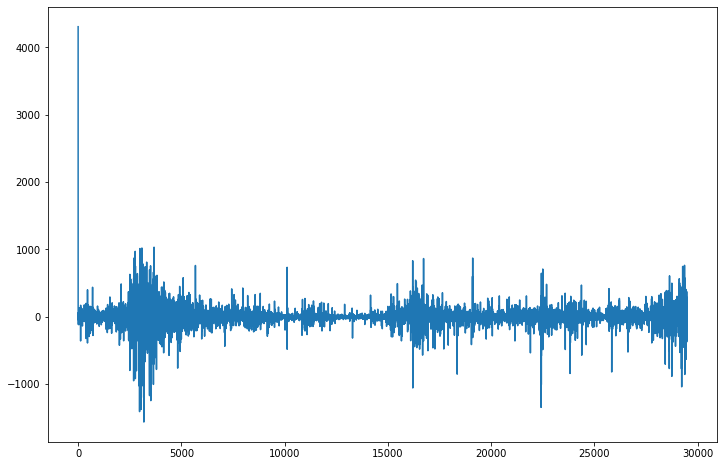

In [103]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arima_mod1.resid.plot(ax=ax);

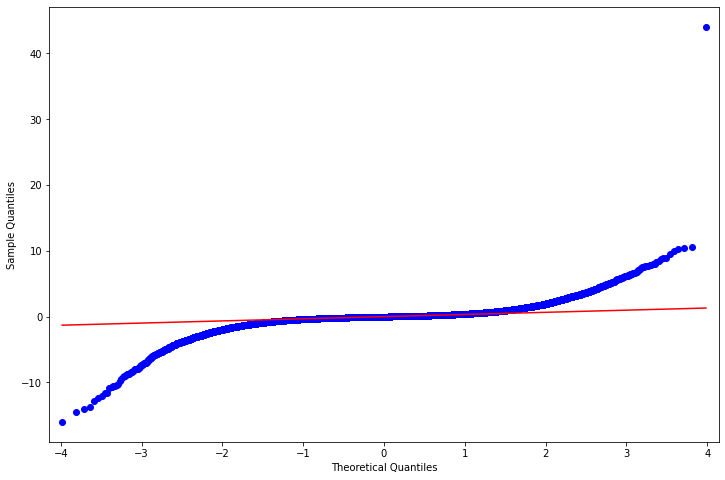

In [104]:
resid = arima_mod1.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

## Building autocorrelation

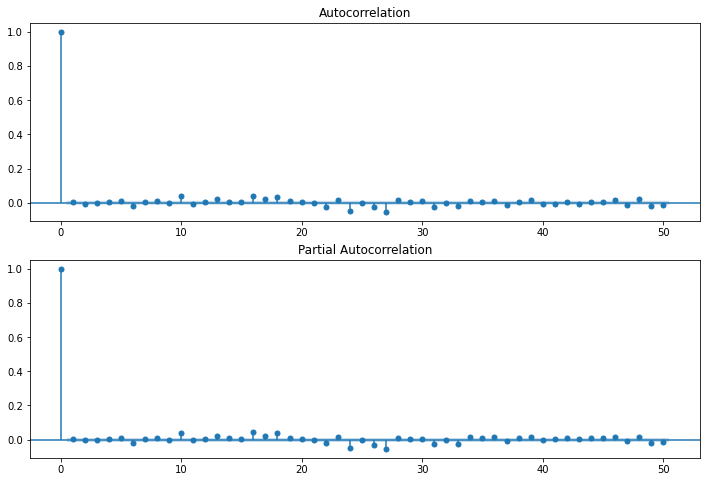

In [105]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=50, ax=ax2)

## Making and building prediction

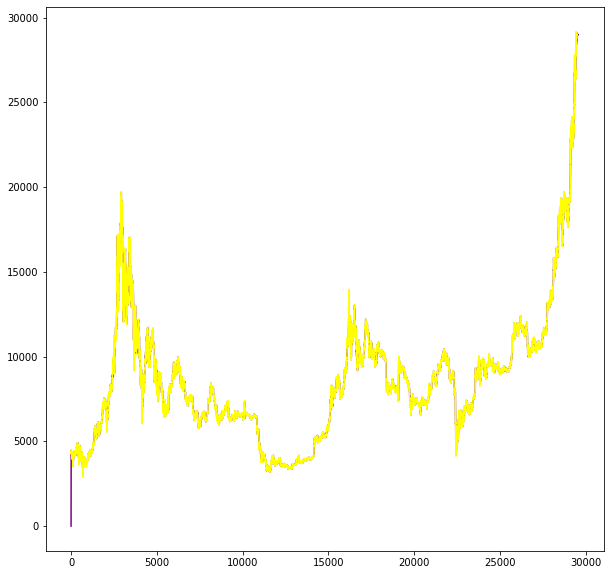

In [108]:
pred1 = arima_mod1.predict(0, len(ay)+100)
plt.figure(figsize=(10,10))
plt.plot(range(len(pred1)), pred1, c='purple')
plt.plot(range(len(ay)), ay, c='yellow')

## Making and building predictions with test/train

In [129]:
test = X[len(X)-21:len(X)] #size 21
train = X[0:len(X)-21] #size 979
predictions = []

In [130]:
arima_mod1_train = ARIMA(train, order=(1, 1, 1)).fit()

In [131]:
predictions = arima_mod1_train.predict(start=979,end=1000)

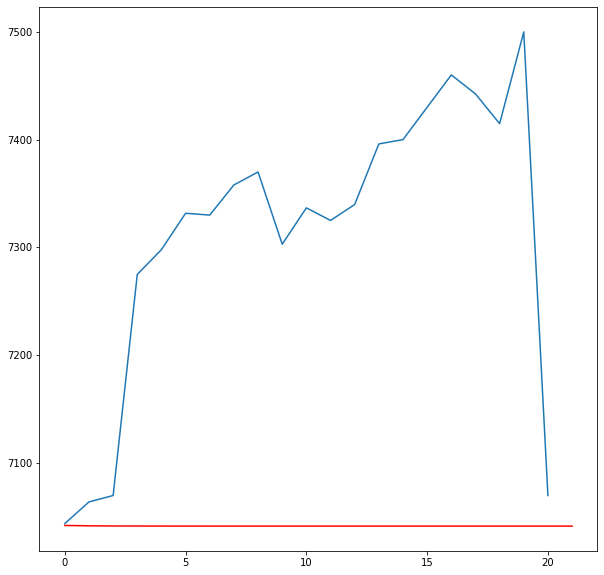

In [132]:
plt.figure(figsize=(10,10))
plt.plot(test)
plt.plot(predictions,c='red')

# Seasonal Autoregressive Integrated Moving-Average

In [133]:
sarima_mod1=SARIMAX(data1['Close'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 2)).fit()
print(sarima_mod1.params)
print(sarima_mod1.aic, sarima_mod1.bic, sarima_mod1.hqic)
sm.stats.durbin_watson(sarima_mod1.resid.values)

ar.L1        0.526222
ma.L1       -0.599589
sigma2    8929.033684
dtype: float64
351780.30441078276 351805.17830395896 351788.2922027253


1.929263877276925

## Analyzing our data

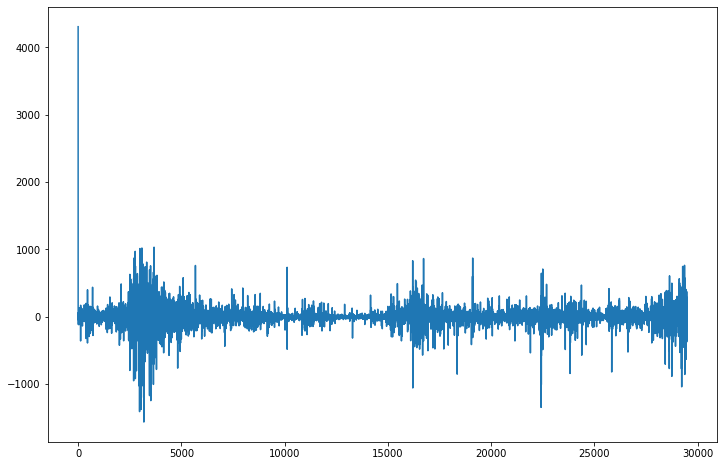

In [135]:
## Analyzing our datafig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = sarima_mod1.resid.plot(ax=ax);

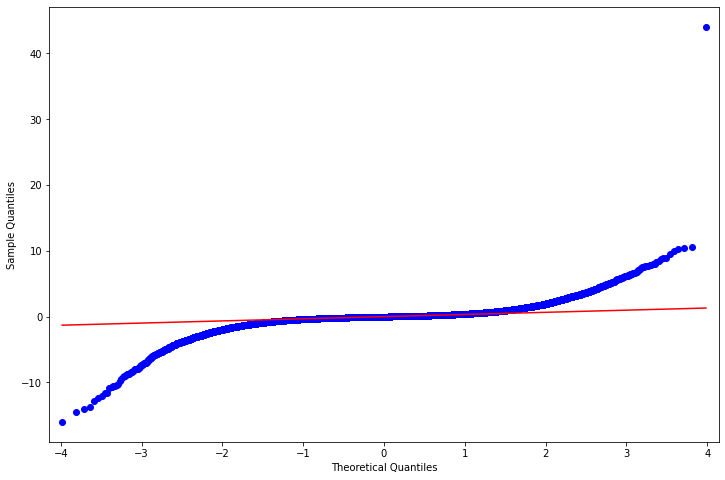

In [136]:
resid = sarima_mod1.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

## Building autocorrelation

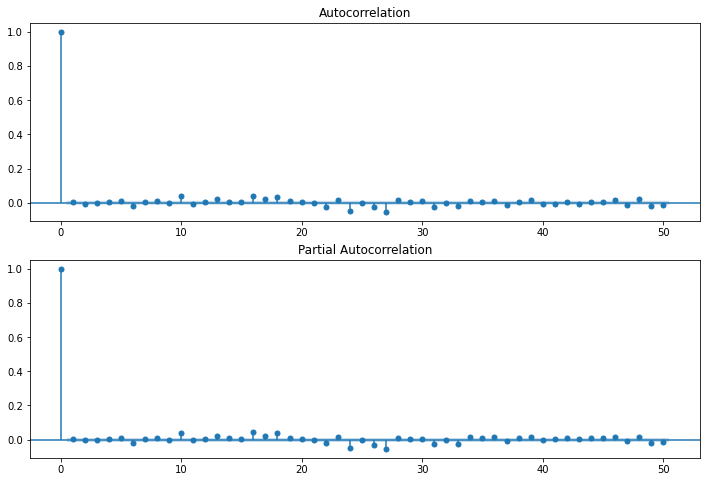

In [137]:
## Building autocorrelationfig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=50, ax=ax2)

## Making and building prediction

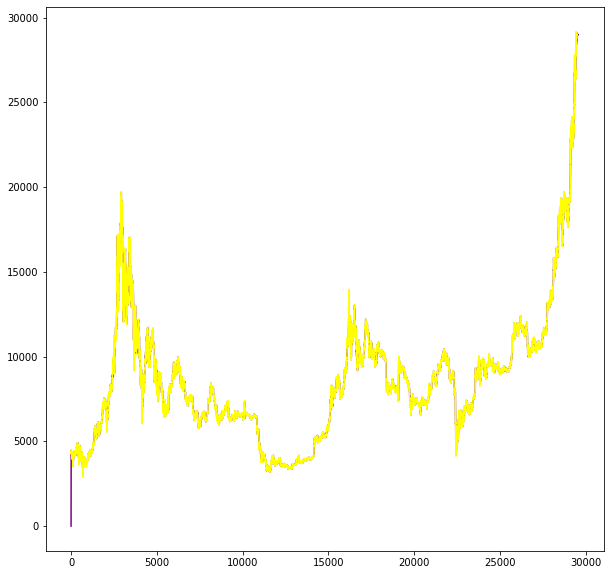

In [138]:
plt.figure(figsize=(10,10))
plt.plot(range(len(pred1)), pred1, c='purple')
plt.plot(range(len(ay)), ay, c='yellow')

## Making and building predictions with test/train

In [142]:
test = X[len(X)-21:len(X)] #size 21
train = X[0:len(X)-21] #size 979
predictions = []

In [143]:
sarima_mod1_train = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 2)).fit()

In [144]:
predictions = sarima_mod1_train.predict(start=979,end=1000)

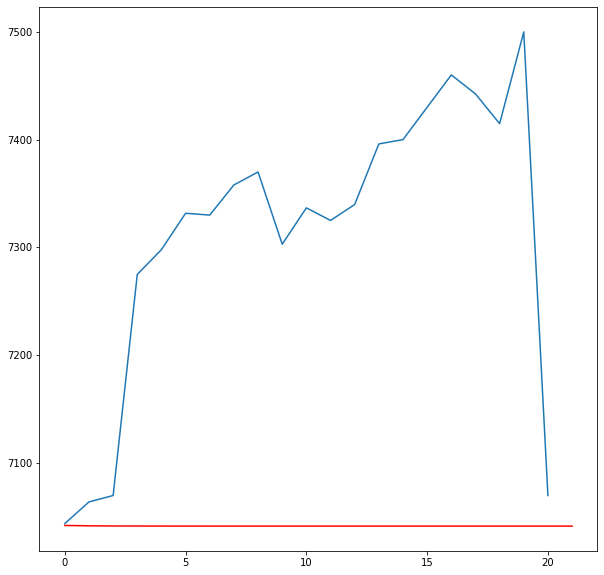

In [145]:
plt.figure(figsize=(10,10))
plt.plot(test)
plt.plot(predictions,c='red')

### ARIMA and SARIMA models are very similar
### ARMA is like more simple version of ARIMA
### In my opinion the most usefull model if ARIMA, it has more params than ARMA, what makes it more accurate
### and also ARIMA is faster than SARIMA